# Evaluate results of experiment

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib
import re

pd.options.display.max_columns = 999

In [2]:
output_folder = pathlib.Path('output/results/')
sns.set_context("paper", font_scale=1.4,)

In [3]:
def prepare(df):
    df['type'] = ['log-model','log-md','md-m']
    df['Precision'] = df['logModel_largestEigenValue'] / df['model_largestEigenValue']
    df['Recall'] = df['logModel_largestEigenValue'] / df['log_largestEigenValue']
    return df

# Collect results

In [4]:
dfs = []

for f_out in output_folder.glob('Figure*'):
    run_id = re.findall(r'Figure [0-9]+[a-z]?.pnml', f_out.name)[0]
    run_folder = output_folder / run_id
    print(f_out)
    
    for f_out_file in run_folder.glob('*.csv'):
        try:
            n = int(re.findall(r'[0-9]+', f_out_file.name)[0])
            # print(f_out, n)
            df = pd.read_csv(f_out_file, sep=';')
            df = prepare(df)
            df['logSize'] = n
            df['source'] = run_id
            dfs.append(df)
        except:
            pass
df = pd.concat(dfs)

output/results/Figure 11.pnml
output/results/Figure 06.pnml
output/results/Figure 10.pnml
output/results/Figure 01.pnml
output/results/Figure 13b.pnml
output/results/Figure 13a.pnml
output/results/Figure 12.pnml
output/results/Figure 05.pnml
output/results/Figure 09.pnml


In [5]:
df.type.value_counts()

md-m         198
log-md       198
log-model    198
Name: type, dtype: int64

In [6]:
df.to_csv('output/results/combined_results.csv')

# Precision
We analyze precision of:
* the simulated log vs. the model
* the simulated log vs. the discovered model
* the discovered model vs. the model

In [7]:
img_out_folder = pathlib.Path('evaluation')
img_out_folder.mkdir(exist_ok=True)

In [8]:
def plot_lines(df, run_id, y_type='Precision'):
    f, ax = plt.subplots(figsize=(8, 5))
    ax.set(xscale="log")
    ax.set_title("Experiment run "+str(run_id))
    
    sns_plot = sns.lineplot(x='logSize',y=y_type, style='type', hue='type', data=df,markers=True).get_figure()
    ax.set_ylim(-0.03,1.03)
    img_name = str(img_out_folder / str(str(run_id) + "_" + y_type+".png"))
    sns_plot.savefig(img_name)
        
    return sns_plot

In [9]:
runs = sorted(df['source'].drop_duplicates().values)

Figure 01.pnml
Figure 05.pnml
Figure 06.pnml
Figure 09.pnml
Figure 10.pnml
Figure 11.pnml
Figure 12.pnml
Figure 13a.pnml
Figure 13b.pnml


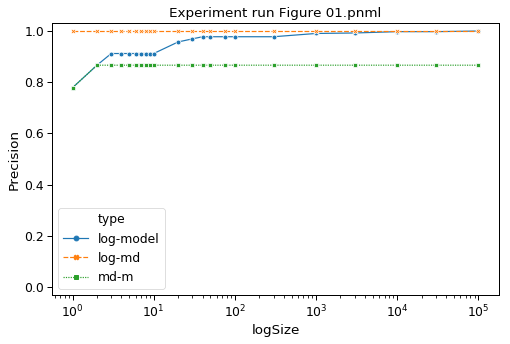

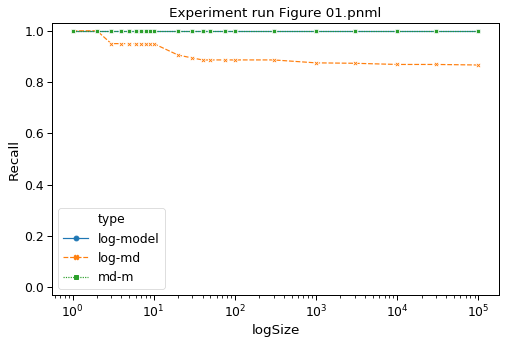

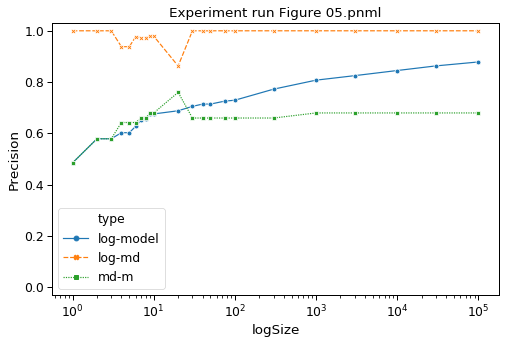

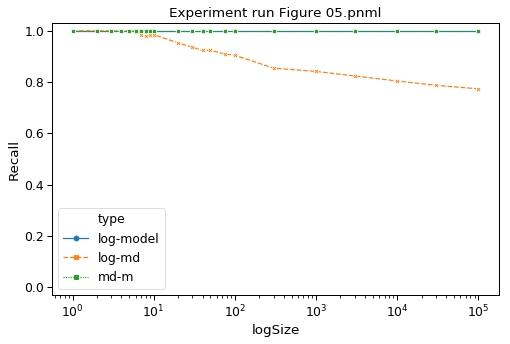

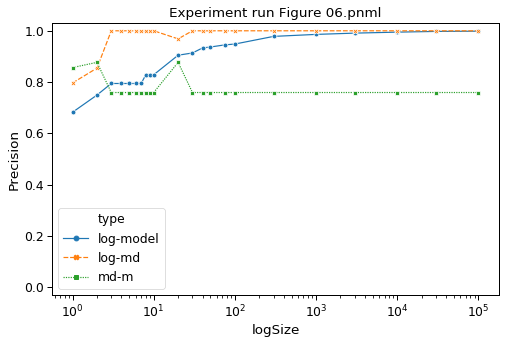

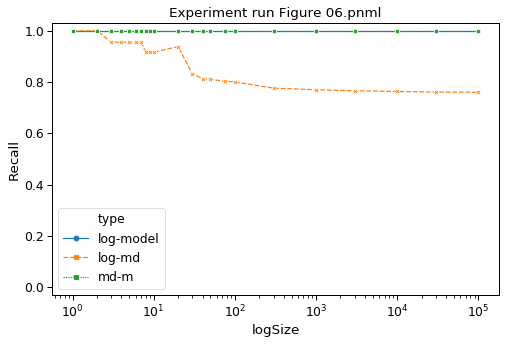

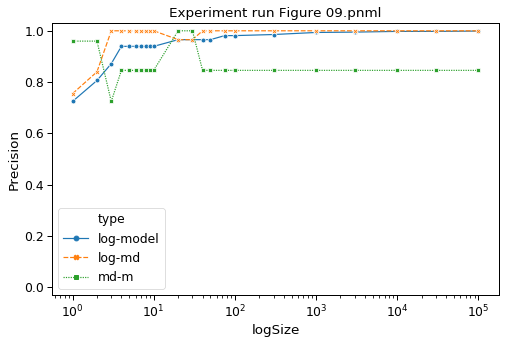

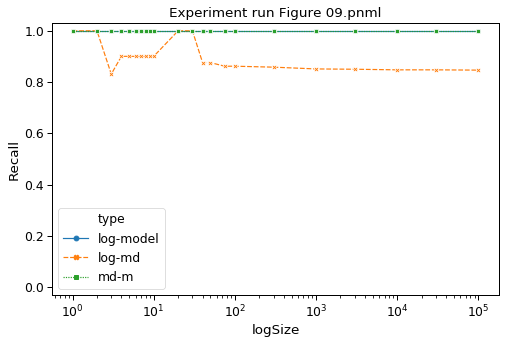

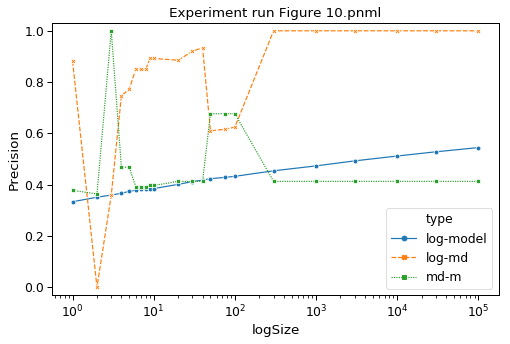

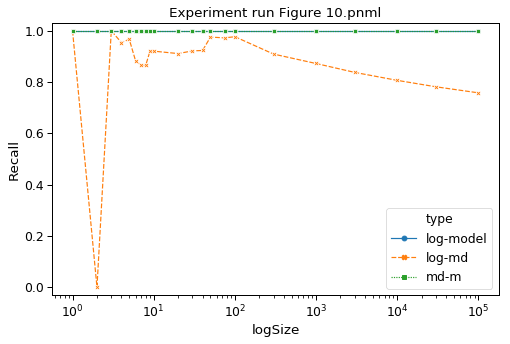

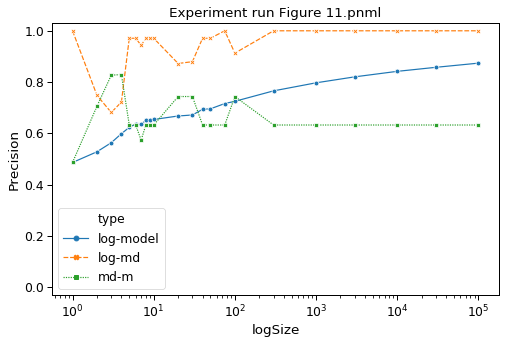

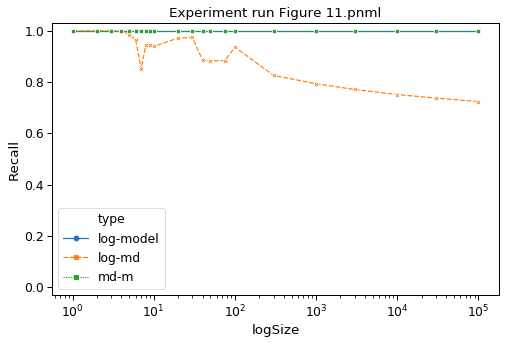

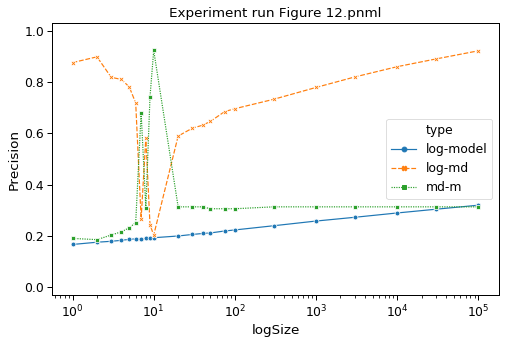

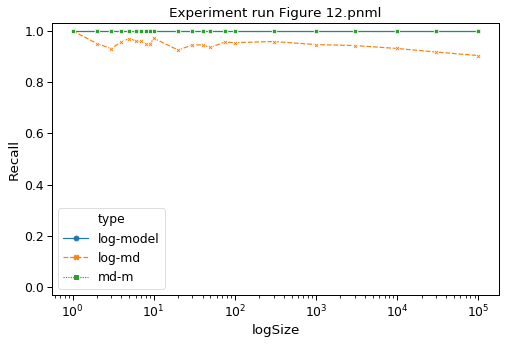

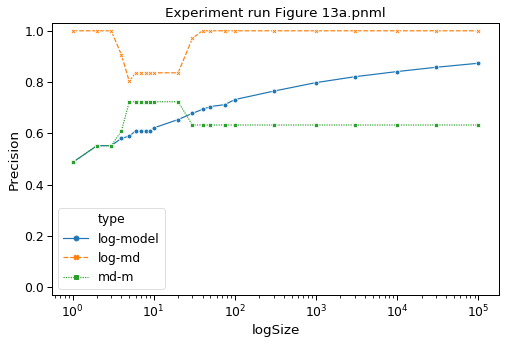

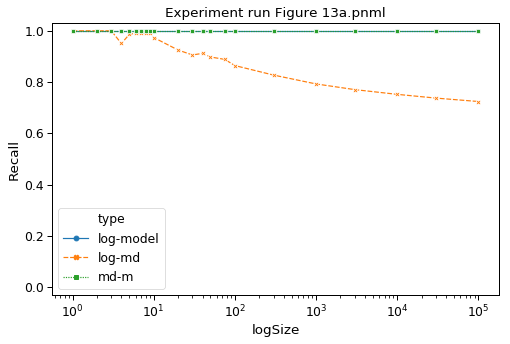

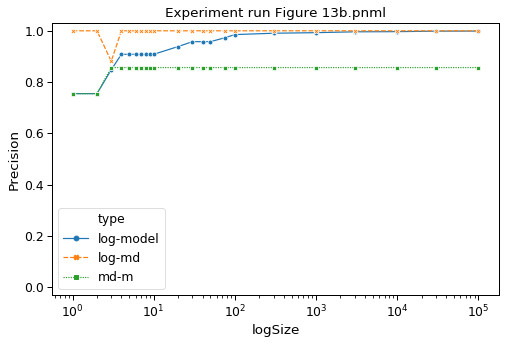

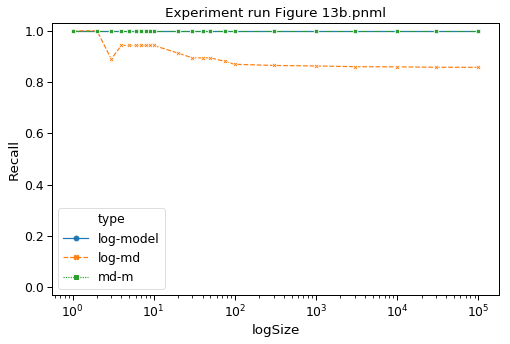

In [10]:
for run_id in runs:
    print(run_id)
    plot_lines(df.loc[lambda x: x['source']==run_id], run_id)
    plot_lines(df.loc[lambda x: x['source']==run_id], run_id, y_type='Recall')
    

# Done.